## Data Preprocessing:
Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Online retail.xlsx')
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [3]:
df.shape

(7500, 1)

In [4]:
df.isnull().sum()

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    0
dtype: int64

In [5]:
df.describe()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
count,7500
unique,5175
top,cookies
freq,223


In [6]:
df.duplicated().any()

True

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df_vis = pd.get_dummies(df,dtype='int')

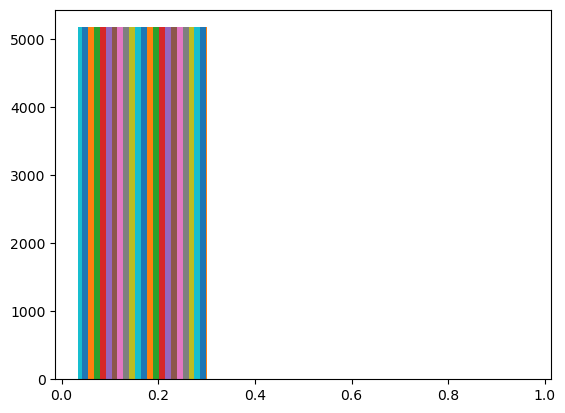

In [19]:
plt.hist(df_vis,bins=3)
plt.show()

## Association Rule Mining:
•	Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.

•	 Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.

•	Set appropriate threshold for support, confidence and lift to extract meaning full rules.


In [9]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [10]:
# shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,
# green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil

transaction = [
    ['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes'],
    ['whole wheat flour', 'yams', 'cottage cheese'],
    ['energy drink', 'tomato juice', 'green tea', 'honey'],
    ['salad', 'mineral water', 'salmon'],
    ['antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'],
    ['burgers', 'meatballs', 'eggs'],
    ['chutney'],
    ['turkey', 'avocado'],
    ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
    ['low fat yogurt'],
    ['whole wheat pasta', 'french fries'],
    ['soup', 'light cream', 'shallot'],
    ['frozen vegetables', 'spaghetti', 'green tea'],
    ['french fries'],
    ['eggs', 'pet food'],
    ['cookies'],
    ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
    ['spaghetti', 'champagne', 'cookies']
]

In [11]:
te = TransactionEncoder()

In [12]:
te_arr = te.fit_transform(transaction)

In [13]:
df1 = pd.DataFrame(te_arr,columns=te.columns_)
frequency = apriori(df1,min_support=0.05,use_colnames=True)
frequency

,support,itemsets
0,0.055556,(almonds)
1,0.055556,(antioxydant juice)
2,0.111111,(avocado)
3,0.111111,(burgers)
4,0.055556,(champagne)
...,...,...
160,0.055556,"(green tea, honey, tomato juice, energy drink)"
161,0.055556,"(milk, green tea, mineral water, whole wheat r..."
162,0.055556,"(avocado, shrimp, vegetables mix, almonds, gre..."
163,0.055556,"(turkey, burgers, mineral water, cooking oil, ..."


In [14]:
rules = association_rules(frequency,metric='confidence',min_threshold=0.05)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(almonds),0.111111,0.055556,0.055556,0.500000,9.0,0.049383,1.888889,1.000000
1,(almonds),(avocado),0.055556,0.111111,0.055556,1.000000,9.0,0.049383,inf,0.941176
2,(almonds),(green grapes),0.055556,0.055556,0.055556,1.000000,18.0,0.052469,inf,1.000000
3,(green grapes),(almonds),0.055556,0.055556,0.055556,1.000000,18.0,0.052469,inf,1.000000
4,(shrimp),(almonds),0.055556,0.055556,0.055556,1.000000,18.0,0.052469,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
711,(whole wheat rice),"(milk, mineral water, energy bar, green tea)",0.055556,0.055556,0.055556,1.000000,18.0,0.052469,inf,1.000000
712,(mineral water),"(milk, whole wheat rice, energy bar, green tea)",0.166667,0.055556,0.055556,0.333333,6.0,0.046296,1.416667,1.000000
713,(energy bar),"(milk, whole wheat rice, mineral water, green ...",0.055556,0.055556,0.055556,1.000000,18.0,0.052469,inf,1.000000
714,(milk),"(whole wheat rice, energy bar, mineral water, ...",0.055556,0.055556,0.055556,1.000000,18.0,0.052469,inf,1.000000


## Analysis and Interpretation:

•	Analyse the generated rules to identify interesting patterns and relationships between the products.

•	Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.


In [15]:
rules.sort_values('confidence', ascending=False, inplace=True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
358,"(milk, green tea)",(whole wheat rice),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf,1.000000
434,"(shrimp, vegetables mix)","(almonds, green grapes)",0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf,1.000000
382,"(salad, mineral water)",(salmon),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf,1.000000
383,"(salad, salmon)",(mineral water),0.055556,0.166667,0.055556,1.0,6.0,0.046296,inf,0.882353
384,"(mineral water, salmon)",(salad),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf,1.000000


In [16]:
for index, rule in rules.iterrows():
    print(f"Rule: {rule['antecedents']} -> {rule['consequents']}")
    print(f"Support: {rule['support']}")
    print(f"Confidence: {rule['confidence']}")
    print(f"Lift: {rule['lift']}")
    print("----")

Rule: frozenset({'milk', 'green tea'}) -> frozenset({'whole wheat rice'})
Support: 0.05555555555555555
Confidence: 1.0
Lift: 18.0
----
Rule: frozenset({'shrimp', 'vegetables mix'}) -> frozenset({'almonds', 'green grapes'})
Support: 0.05555555555555555
Confidence: 1.0
Lift: 18.0
----
Rule: frozenset({'salad', 'mineral water'}) -> frozenset({'salmon'})
Support: 0.05555555555555555
Confidence: 1.0
Lift: 18.0
----
Rule: frozenset({'salad', 'salmon'}) -> frozenset({'mineral water'})
Support: 0.05555555555555555
Confidence: 1.0
Lift: 6.0
----
Rule: frozenset({'mineral water', 'salmon'}) -> frozenset({'salad'})
Support: 0.05555555555555555
Confidence: 1.0
Lift: 18.0
----
Rule: frozenset({'salad'}) -> frozenset({'mineral water', 'salmon'})
Support: 0.05555555555555555
Confidence: 1.0
Lift: 18.0
----
Rule: frozenset({'tomato juice'}) -> frozenset({'green tea', 'honey', 'energy drink'})
Support: 0.05555555555555555
Confidence: 1.0
Lift: 18.0
----
Rule: frozenset({'salmon'}) -> frozenset({'salad'

## Answer 1:

The parameter lift in association rule is used to find the association between antecendent and consequent of a rule.
The lift is calculated by the formula: -

(No. of times X and Y occured) / [ (Total No. of times X occured) * (Total Num of times Y occured) ]


Answer 2: 

Support indicates the frequency of occurrence of an itemset in the dataset.
The Support is calculated by the formula: -

Support = (Num of times X and Y occured) / (Num of transaction)

Confidence measures the certaninty of association rule.
The Confidence is calculated by the formula: -

Confidence = (Num of times X and Y occured) / [ (Total num of times X occured)]

Answer 3:

Limitations of Association rules are :

1.The algorithm can generate large number of rule which may b not useful at all.

2.Setting the right threshold for Support, Confidence, Lift can be challenging.

3.High computational complexibility for large dataset.